In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the file
df = pd.read_json (r'SIRI.json')

#print the head
df

,c,h,l,o,s,t,v
0,5.34,5.40,5.32,5.36,ok,1499693400,24026100
1,5.39,5.40,5.32,5.35,ok,1499779800,12586800
2,5.41,5.44,5.38,5.41,ok,1499866200,17006500
3,5.43,5.47,5.39,5.39,ok,1499952600,17455600
4,5.48,5.48,5.43,5.46,ok,1500039000,13135200
...,...,...,...,...,...,...,...
684,4.93,5.06,4.90,5.04,ok,1585315800,24632800
685,4.81,5.08,4.76,4.96,ok,1585575000,34793000
686,4.94,5.12,4.80,4.84,ok,1585661400,29402000
687,4.64,4.91,4.60,4.76,ok,1585747800,26468000


In [3]:
df['t'] = pd.to_datetime(df['t'], unit='s')
df = df.rename(columns={'c': 'Close', 'h': 'High', 'l':'Low',  'o': 'Open', 's': 'Status', 't': 'Date', 'v': 'Volume'})
df.head()

,Close,High,Low,Open,Status,Date,Volume
0,5.34,5.40,5.32,5.36,ok,2017-07-10 13:30:00,24026100
1,5.39,5.40,5.32,5.35,ok,2017-07-11 13:30:00,12586800
2,5.41,5.44,5.38,5.41,ok,2017-07-12 13:30:00,17006500
3,5.43,5.47,5.39,5.39,ok,2017-07-13 13:30:00,17455600
4,5.48,5.48,5.43,5.46,ok,2017-07-14 13:30:00,13135200


# Linear Regression

In [4]:
#read the file
df = pd.read_json (r'SIRI.json')

#print the head
df

,c,h,l,o,s,t,v
0,5.34,5.40,5.32,5.36,ok,1499693400,24026100
1,5.39,5.40,5.32,5.35,ok,1499779800,12586800
2,5.41,5.44,5.38,5.41,ok,1499866200,17006500
3,5.43,5.47,5.39,5.39,ok,1499952600,17455600
4,5.48,5.48,5.43,5.46,ok,1500039000,13135200
...,...,...,...,...,...,...,...
684,4.93,5.06,4.90,5.04,ok,1585315800,24632800
685,4.81,5.08,4.76,4.96,ok,1585575000,34793000
686,4.94,5.12,4.80,4.84,ok,1585661400,29402000
687,4.64,4.91,4.60,4.76,ok,1585747800,26468000


In [9]:
df['t'] = pd.to_datetime(df['t'], unit='s')

In [10]:
X = df[['t']]
y = df['c'].values.reshape(-1, 1)
print(X.shape, y.shape)

(689, 1) (689, 1)


In [11]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,t
0,2017-07-10 13:30:00
1,2017-07-11 13:30:00
2,2017-07-12 13:30:00
3,2017-07-13 13:30:00
4,2017-07-14 13:30:00


In [12]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,t
645,2020-01-31 14:30:00
163,2018-03-02 14:30:00
380,2019-01-11 14:30:00
602,2019-11-27 14:30:00
431,2019-03-27 13:30:00


In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

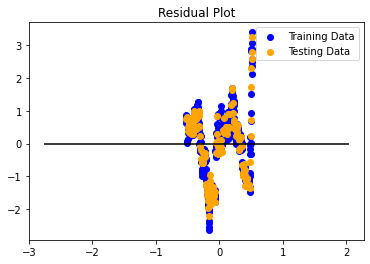

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
predictions = model.predict(X_test_scaled)
predictions

array([[-0.09272795],
       [ 0.46872708],
       [-0.13567173],
       [-0.01831824],
       [-0.04559453],
       [-0.20689556],
       [ 0.42054625],
       [-0.25926602],
       [ 0.34404173],
       [-0.13671914],
       [ 0.49486867],
       [-0.27493352],
       [ 0.46767967],
       [-0.41114037],
       [ 0.50115312],
       [ 0.27596013],
       [ 0.14189174],
       [-0.08120644],
       [ 0.45301594],
       [ 0.076996  ],
       [ 0.01100922],
       [-0.02255152],
       [-0.08958572],
       [ 0.23720598],
       [-0.10005981],
       [-0.03197821],
       [-0.14719323],
       [-0.44465747],
       [ 0.48129599],
       [-0.01936565],
       [-0.32416176],
       [ 0.23196893],
       [-0.31892471],
       [-0.3629159 ],
       [ 0.18588293],
       [-0.17023623],
       [-0.20584815],
       [ 0.09794419],
       [-0.15661991],
       [-0.32520917],
       [-0.14824064],
       [-0.41951965],
       [ 0.00681958],
       [ 0.33461505],
       [ 0.44568407],
       [ 0

In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

In [ ]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(X_test_scaled)
rms=np.sqrt(np.mean(np.power((np.array(y_test_scaled)-np.array(preds)),2)))
rms

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# K-Nearest Neighbours

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
#read the file
df = pd.read_json (r'SIRI.json')

#print the head
df

,c,h,l,o,s,t,v
0,5.34,5.40,5.32,5.36,ok,1499693400,24026100
1,5.39,5.40,5.32,5.35,ok,1499779800,12586800
2,5.41,5.44,5.38,5.41,ok,1499866200,17006500
3,5.43,5.47,5.39,5.39,ok,1499952600,17455600
4,5.48,5.48,5.43,5.46,ok,1500039000,13135200
...,...,...,...,...,...,...,...
684,4.93,5.06,4.90,5.04,ok,1585315800,24632800
685,4.81,5.08,4.76,4.96,ok,1585575000,34793000
686,4.94,5.12,4.80,4.84,ok,1585661400,29402000
687,4.64,4.91,4.60,4.76,ok,1585747800,26468000


In [19]:
df['t'] = pd.to_datetime(df['t'], unit='s')
df = df.rename(columns={'c': 'Close', 'h': 'High', 'l':'Low',  'o': 'Open', 's': 'Status', 't': 'Date', 'v': 'Volume'})
df.head()

,Close,High,Low,Open,Status,Date,Volume
0,5.34,5.40,5.32,5.36,ok,2017-07-10 13:30:00,24026100
1,5.39,5.40,5.32,5.35,ok,2017-07-11 13:30:00,12586800
2,5.41,5.44,5.38,5.41,ok,2017-07-12 13:30:00,17006500
3,5.43,5.47,5.39,5.39,ok,2017-07-13 13:30:00,17455600
4,5.48,5.48,5.43,5.46,ok,2017-07-14 13:30:00,13135200


In [20]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.02,0.08
1,-0.04,0.08
2,0.00,0.06
3,-0.04,0.08
4,-0.02,0.05


In [21]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [22]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [23]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.51


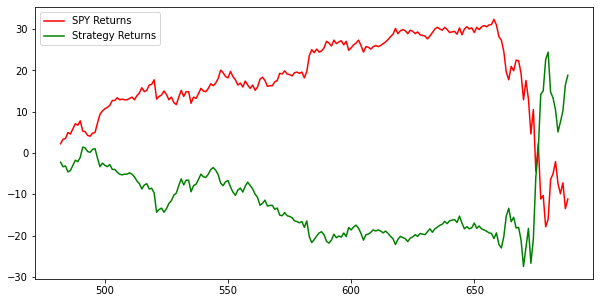

In [24]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

What is Sharpe Ratio?
Sharpe ratio is a measure for calculating risk-adjusted return. It is the ratio of the excess expected return of investment (over risk-free rate) per unit of volatility or standard deviation.

Let us see the formula for Sharpe ratio which will make things much clearer. The sharpe ratio calculation is done in the following manner

Sharpe Ratio = (Rx – Rf) / StdDev(x)

Where,
x is the investment
Rx is the average rate of return of x
Rf is the risk-free rate of return
StdDev(x) is the standard deviation of Rx
Once you see the formula, you will understand that we deduct the risk-free rate of return as this helps us in figuring out if the strategy makes sense or not. If the Numerator turned out negative, wouldn’t it be better to invest in a government bond which guarantees you a risk-free rate of return? Some of you would recognise this as the risk-adjusted return.

In the denominator, we have the standard deviation of the average return of the investment. It helps us in identifying the volatility as well as the risk associated with the investment.

Thus, the Sharpe ratio helps us in identifying which strategy gives better returns in comparison to the volatility. There, that is all when it comes to sharpe ratio calculation.

Let’s take an example now to see how the Sharpe ratio calculation helps us.

You have devised a strategy and created a portfolio of different stocks. After backtesting, you observe that this portfolio, let’s call it Portfolio A, will give a return of 11%. However, you are concerned with the volatility at 8%. 

Now, you change certain parameters and pick different financial instruments to create another portfolio, Portfolio B. This portfolio gives an expected return of 8%, but the volatility now drops to 4%. 

In [25]:
# Calculate Sharpe reatio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -3.16


# Auto ARIMA

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [27]:
#read the file
df = pd.read_json (r'SIRI.json')

#print the head
df

,c,h,l,o,s,t,v
0,5.34,5.40,5.32,5.36,ok,1499693400,24026100
1,5.39,5.40,5.32,5.35,ok,1499779800,12586800
2,5.41,5.44,5.38,5.41,ok,1499866200,17006500
3,5.43,5.47,5.39,5.39,ok,1499952600,17455600
4,5.48,5.48,5.43,5.46,ok,1500039000,13135200
...,...,...,...,...,...,...,...
684,4.93,5.06,4.90,5.04,ok,1585315800,24632800
685,4.81,5.08,4.76,4.96,ok,1585575000,34793000
686,4.94,5.12,4.80,4.84,ok,1585661400,29402000
687,4.64,4.91,4.60,4.76,ok,1585747800,26468000


Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

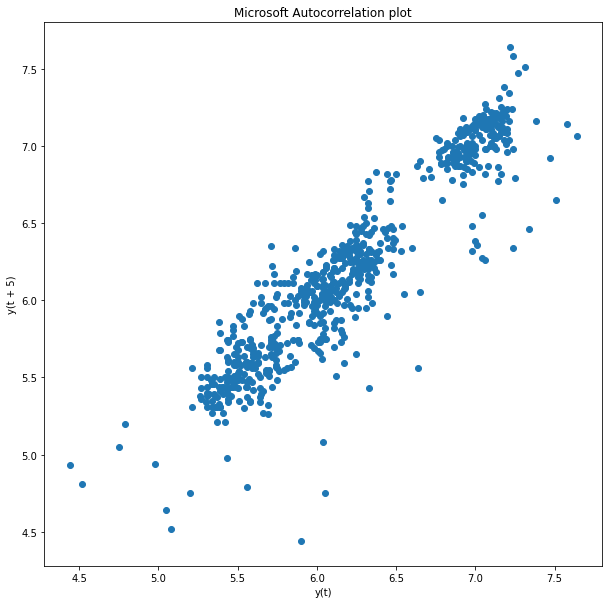

In [28]:
plt.figure(figsize=(10,10))
lag_plot(df['c'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [29]:
size = len(df)

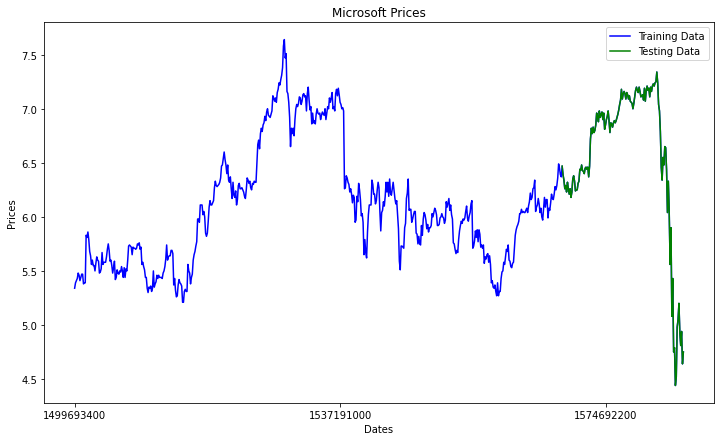

In [30]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['c'], 'blue', label='Training Data')
plt.plot(test_data['c'], 'green', label='Testing Data')
plt.xticks(np.arange(0,size, 300), df['t'][0:size:300])
plt.legend()

In [31]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [32]:
train_ar = train_data['c'].values
test_ar = test_data['c'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.023
Symmetric mean absolute percentage error: 10.808


In [33]:
pd.DataFrame({"Prediction": predictions, 'Actual': test_ar})

,Prediction,Actual
0,[6.3716614367976865],6.47
1,[6.467491741991609],6.39
2,[6.396465307685424],6.34
3,[6.344233690726262],6.26
4,[6.264781712060437],6.29
...,...,...
133,[5.188738419849064],4.93
134,[4.97538234387751],4.81
135,[4.807876661707446],4.94
136,[4.904859102699367],4.64


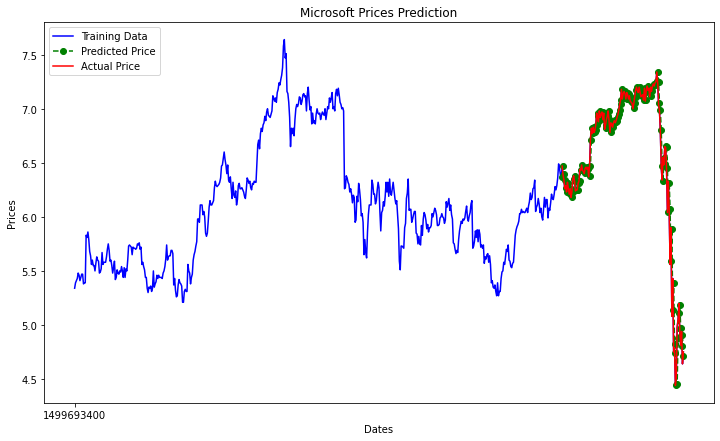

In [34]:
plt.figure(figsize=(12,7))
plt.plot(df['c'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['c'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,size, 1300), df['t'][0:size:1300])
plt.legend()

# Prophet

In [35]:
#read the file
df = pd.read_json (r'SIRI.json')

#print the head
df

,c,h,l,o,s,t,v
0,5.34,5.40,5.32,5.36,ok,1499693400,24026100
1,5.39,5.40,5.32,5.35,ok,1499779800,12586800
2,5.41,5.44,5.38,5.41,ok,1499866200,17006500
3,5.43,5.47,5.39,5.39,ok,1499952600,17455600
4,5.48,5.48,5.43,5.46,ok,1500039000,13135200
...,...,...,...,...,...,...,...
684,4.93,5.06,4.90,5.04,ok,1585315800,24632800
685,4.81,5.08,4.76,4.96,ok,1585575000,34793000
686,4.94,5.12,4.80,4.84,ok,1585661400,29402000
687,4.64,4.91,4.60,4.76,ok,1585747800,26468000


In [36]:
df['t'] = pd.to_datetime(df['t'], unit='s')
df = df.rename(columns={'c': 'Close', 'h': 'High', 'l':'Low',  'o': 'Open', 's': 'Status', 't': 'Date', 'v': 'Volume'})
df.head()

,Close,High,Low,Open,Status,Date,Volume
0,5.34,5.40,5.32,5.36,ok,2017-07-10 13:30:00,24026100
1,5.39,5.40,5.32,5.35,ok,2017-07-11 13:30:00,12586800
2,5.41,5.44,5.38,5.41,ok,2017-07-12 13:30:00,17006500
3,5.43,5.47,5.39,5.39,ok,2017-07-13 13:30:00,17455600
4,5.48,5.48,5.43,5.46,ok,2017-07-14 13:30:00,13135200


In [43]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(df)):
    new_data['Date'][i] = df['Date'][i]
    new_data['Close'][i] = df['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:size]
valid = new_data[0:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
new_data[412:]

In [ ]:
print(valid['y'])

In [46]:
#rmse
forecast_valid = forecast['yhat'][size:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

1.020365761194404

C:\Users\layla\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\layla\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


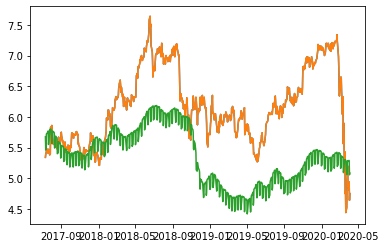

In [47]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [48]:
pd.DataFrame({"Prediction": valid['Predictions'], "Actual": valid['y']})

,Prediction,Actual
Date,,
2017-07-10 13:30:00,5.674798,5.34
2017-07-11 13:30:00,5.458483,5.39
2017-07-12 13:30:00,5.501914,5.41
2017-07-13 13:30:00,5.706662,5.43
2017-07-14 13:30:00,5.730438,5.48
...,...,...
2020-03-27 13:30:00,5.276899,4.93
2020-03-30 13:30:00,5.288848,4.81
2020-03-31 13:30:00,5.286663,4.94
